# The numpy.random package

<br>

## Overall purpose of the numpy.random package 

***

NumPy (Numerical Python)is an open source library for scientific computing in Python that’s used in almost every field of science and engineering. It provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.[1]


Numpy random function is a module inside the numpy library. Random number does NOT mean a different number every time. Random means something that can not be predicted logically.
The puropse of this module is to generate pseudo random numbers through various funtions and methods using PRNG's. 
Pseudo Random Number Generator(PRNG) refers to an algorithm that uses mathematical formulas to produce sequences of random numbers. PRNGs generate a sequence of numbers approximating the properties of random numbers. A PRNG starts from an arbitrary starting state using a seed state. Many numbers are generated in a short time and can also be reproduced later, if the starting point in the sequence is known. Hence, the numbers are deterministic and efficient.

Previously the Numpy random library used bits provided by the the Mersenne Twister (MT19937)PRNG and was the most commonly used in R and Python languages. This was the PRNG used in the legacy *RandomState* random module in Numpy. This has now been replaced with the PCG64 PRNG which has been deemed to have beeter statistical properties than the MT19937. Some reasons the MT19937 may have been replaced was due to some deficiencies mentioned below[2]

- Is not as fast as many PRNG'S.(The application should spend its time running the actual algorithms, not generating random numbers)
- It has a large state (2,500 bytes).
- The implementation is larger than other PRNG'S and more complicated.
- Its has one statistical failure.(It has serious problems around 0, suggesting that it randomizes itself pretty poorly)

Below are some of the differnces and advantages of using the PCG family of bit generators over the Mersenne Twister PRNG.[3]


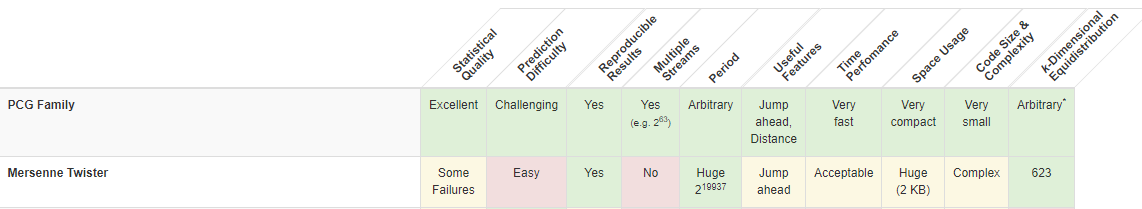


#### What is the purpose of generating random numbers?

Random number does NOT mean a different number every time. Random means something that can not be predicted logically.Computers work on programs, and programs are definitive set of instructions. So it means there must be some algorithm to generate a random number as well.

If there is a program to generate random number it can be predicted, thus it is not truly random.

Random numbers generated through a generation algorithm are called pseudo random.

Why would a programmer or data analyst use this module?  There are several reasons:[4][5]

- The main reason to use randomness is to introduce unpredictability.

- PRNGs are suitable for applications where many random numbers are required and where it is useful that the same sequence can be replayed easily. Popular examples of such applications are simulation and modeling applications.

- Random number generators are used in  several industries to  generate random  values.  These industries  are  not  limited  but  include  gaming,  financial institutions, secure communication, cyber security and others.

- It is random number generation that helps digital currencies, such as Bitcoin, be almost immune to cyber-attack. The algorithms involved in random number generation for such use cases are much more advanced than those used in playlist selection and other simple “random” applications.

- PRNGs are not suitable for applications where it is important that the numbers are really unpredictable, such as data encryption and gambling. These applications require TRNG (True Random Number Generation) or a CSRNG(cryptographic PRNG).


In [1]:
# Lets import the generator:
from numpy.random import default_rng # import default PC6G4 
rng= default_rng(12345)
print(rng) # 

Generator(PCG64)


<br>

## Simple Random Data and Permutations Functions:

***
Four methods used to generate random data:
- Integers
- Random
- Choice
- Bytes


Previously used methods in the legacy random generator included rand,randn,rantint. These are no longer included in the new version. Whilst these methods can still be used we will not cover them
in this package overview. 

In [2]:
# Libraries required to run the notebook
import numpy as np
from numpy import random
from numpy.random import default_rng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#dir(random) # view directory of all methods available in the random package of numpy

<br>

## Simple Random Data Method 1- Random Integers

***

The first method is the numpy.random.Generator. integers. This method will return random integers from the **discrete uniform distribution** of the specified dtype.
In previous documentation the numpy user would have used the code random.randint to generate this data but in the updated version we are using rng.integers.

In [3]:
# We begin by setting the rng as the np random default generator
rng = np.random.default_rng()

In [4]:
# Generate a random integer up to but not including 4: 
rng.integers(4)

1

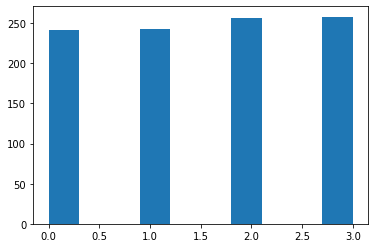

In [5]:
# this will create a random array with numbers up to but not including 4 and the size = 20 random numbers 
p=rng.integers(4, size=1000) # if I use shift+tab here i can get a docstring to show what I need to pass into the function
plt.hist(p) # using matplotlib to visualise the output.
plt.show() # will be a standard uniform distribution on the histogram we can see there is ~250 instances of each number.
#print(p)

[[1 2 2 5 1]
 [0 5 0 6 1]
 [1 3 0 3 4]]


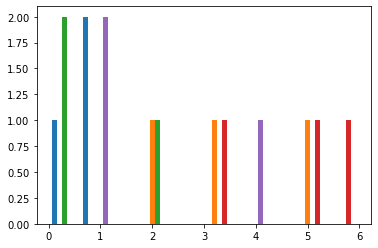

In [6]:
# generate a 3 x 5 array of integers between 0 and 6 inclusive and show results on a histogram:
x= rng.integers(7, size = (3,5))  # 3 is the number of rows 5 is the number of colums
print(x)
plt.hist(x)
plt.show()

In [7]:
# Generate a 2 by 4 array using broadcasting with dtype of uint8
rng.integers([5, 7, 9, 8], [[10], [20]], dtype=np.uint8)

array([[ 6,  8,  9,  9],
       [19, 19, 13, 16]], dtype=uint8)

In [8]:
rng.integers(100, size= 10 ,endpoint=True) # endpoint true means 100 willbe included in the numbers[6]

array([47, 95, 86, 83, 79, 27, 34, 15, 75,  3], dtype=int64)

In [9]:
rng.integers(100, size = (5,5))

array([[76, 24,  6, 31, 66],
       [86, 17, 85, 68, 93],
       [40, 77, 85, 53, 43],
       [85, 90, 83, 31, 42],
       [14, 32, 35, 88, 35]], dtype=int64)

In [10]:
rng.integers (55, size =(3,5,2))# the number 3 here will denote the amount of arrays I want to generate, 5 rows and 2 columns

array([[[11, 12],
        [18, 52],
        [ 4, 50],
        [13, 31],
        [39,  4]],

       [[13, 47],
        [27, 24],
        [44, 23],
        [26, 12],
        [18, 34]],

       [[45, 25],
        [17, 46],
        [53, 43],
        [28, 52],
        [50, 20]]], dtype=int64)

(array([[1., 0., 1., 2., 0., 0., 0., 4., 0., 2.],
        [0., 1., 0., 2., 1., 2., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 1., 1., 0., 1.],
        [2., 0., 2., 1., 1., 2., 1., 0., 0., 1.],
        [0., 2., 1., 1., 1., 0., 1., 1., 1., 2.],
        [1., 1., 0., 6., 0., 0., 1., 0., 0., 1.],
        [2., 1., 0., 0., 0., 1., 2., 1., 1., 2.],
        [2., 0., 1., 2., 1., 1., 0., 0., 2., 1.],
        [1., 1., 2., 3., 2., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 1., 2., 2., 3., 0., 1.]]),
 array([  6. , 103.7, 201.4, 299.1, 396.8, 494.5, 592.2, 689.9, 787.6,
        885.3, 983. ]),
 <a list of 10 BarContainer objects>)

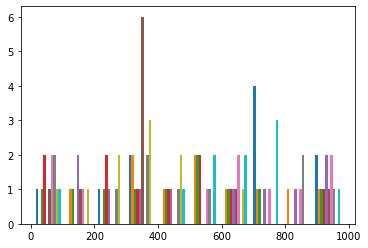

In [11]:
# lets visualise the random interger random function in numpy using the matplotlib
x= rng.integers(1000, size = (10,10))
plt.hist(x)

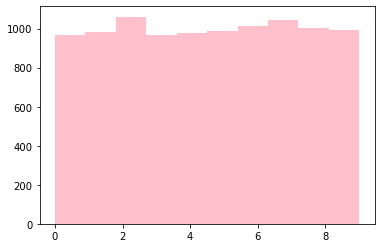

In [12]:
dist = [rng.integers(0,10) for i in range(10000)]
# histogram plot of distribution
plt.hist(dist, color="pink")
plt.show()

In [13]:
#lets create some user input to select some random integers[7]
print("Enter the Range: ")
start = int(input())
end = int(input())


randnum = rng.integers(start, end)
print("\nRandom Number =", randnum)

Enter the Range: 


 3
 6



Random Number = 4


In [14]:

# Generate Multiple Random Numbers in Given Range[7]
print("Enter the Range (Interval): ")
a = int(input())
b = int(input())

if a>b:
  t = a
  a = b
  b = t

print("\nHow Many Random Numbers to Generate ? ")
tot = int(input())

randnums = []
for i in range(tot):
  randnums.append(rng.integers(a, b))

print("\nList of " +str(tot)+ " Random Numbers between " +str(a)+ " and " +str(b))
for i in range(tot):
  print(randnums[i], end=" ")
print()

Enter the Range (Interval): 


 3
 2



How Many Random Numbers to Generate ? 


 2



List of 2 Random Numbers between 2 and 3
2 2 


<br>

## Simple Random Data Method 2- Random 

***

Return random floats in the half-open interval [0.0, 1.0).
Results are from the **continuous uniform distribution** over the stated interval.







In [15]:
rng.random() # will return a flaoting point number between 0-1

0.8852973113485263

In [16]:
rng.random(10)# returns an array of 10 random floating point numbers 

array([0.79658197, 0.36977929, 0.10502143, 0.74059076, 0.29042574,
       0.2883123 , 0.20206367, 0.64939725, 0.9528694 , 0.45551243])

In [17]:
rng.random((5,)) # will return a random array with five floating point numbers

array([0.65493647, 0.79945009, 0.31755323, 0.63621292, 0.9963604 ])

In [18]:
#Generate an 4x3 array of floats between 5 and 10
rng.random((4,3)) * 5 + 5


array([[8.18193446, 5.27552875, 5.26151839],
       [8.60497525, 7.15666711, 5.18370495],
       [5.39647843, 8.27507879, 6.35558832],
       [8.21620825, 5.41213925, 6.51426819]])

In [19]:
# Another way to write the above code in a different format
5*rng.random((3,3)) + 5

array([[6.36763009, 9.76177465, 6.78665392],
       [8.70355355, 7.5541038 , 8.93887096],
       [8.56764996, 6.61933478, 9.63700676]])

In [20]:
6 *rng.random((3, 2)) - 9 #Three rows-by-two colums array of random numbers from [-9, -3 ):

array([[-6.19626185, -4.74568269],
       [-7.70879824, -8.39933745],
       [-7.71497681, -5.9884598 ]])

In [21]:
np.random.rand(3,2) # previous coding used with the MT19937 generator 
#https://github.com/Disha-Shivale/Numpy-RandomNumber/blob/main/Numpy%20-%20Random%20number.ipynb

array([[0.09206383, 0.18502188],
       [0.6263026 , 0.53527241],
       [0.56580383, 0.38552434]])

In [22]:
rng.random((3,2)) # new coding for a similiar array using the updated API reference material

array([[0.77373984, 0.06860799],
       [0.80580493, 0.76722734],
       [0.10696614, 0.99245971]])

In [23]:
# this will return a list of 10 random numbers  
for i in range (10):
    print(rng.random())
    

0.6466425330050561
0.4241090334981098
0.09961171063041763
0.11575850998138959
0.06146984227811314
0.7348143768319658
0.14269837126890783
0.6660249818120737
0.6380733535234552
0.4028898922851132


In [24]:
#https://realpython.com/python-random/
#One thing you might have noticed is that a majority of the functions from random return a 
#scalar value (a single int, float, or other object). If you wanted to generate a sequence of random numbers,
#one way to achieve that would be with a Python list comprehension:

[rng.random() for _ in range(5)]


[0.5741355845394793,
 0.02062991167057804,
 0.9742251053203191,
 0.8587742383220474,
 0.7028358440226142]

#### Simulating Four Random Coin Flips using random method [8,9]

rng. random will draw numbers between 0 and 1. If a number is drawn that is <0.5 we say it is heads. If the number drawn is >0.5 it is tails.This type of result where results are either True (Heads) or False (Tails) is referred to as Bernoulli trial. 

We want to get the probability that we will get 4 heads in the four flips if we were to repeat the flips 10000 times 


In [25]:
n_all_heads = 0 #We need to initialize the number to zero and then do 10,000 repeats of the 4 flip trials
for _ in range (10000): # using a four loop to simulate the flips
    heads =rng.random(size=4) < 0.5 # use the boolen value to denote that <0.5 is heads 
    n_heads = np.sum(heads) 
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000 # divide amount of times it was all heads in the four flips by the no of trials to get the probability.


0.066

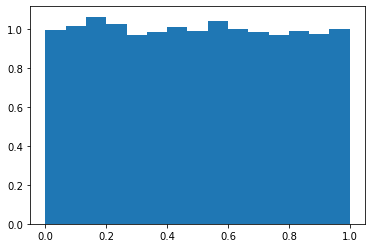

In [26]:
# Using a histogram to visualize the continuois uniform distribution the random method for generating data will give:
x= rng.random((20000,))

c, bin, ig = plt.hist(x, 15, density = True)
plt.show()


<br>

### Simple Random Data Method 3- Choice Method

***

The NumPy random choice() function is used to gets the random samples of a **one-dimensional array** which returns as the random samples of NumPy array. The NumPy random choice() function accepts four parameters. The mandatory parameter is the list or array of elements or numbers. When we pass the list of elements to the NumPy random choice() function it randomly selects the single element and returns as a one-dimensional array, but if we specify some size to the size parameter, then it returns the one-dimensional array of that specified size.This is uselful when you want to choose multiple random items from a particular list .The NumPy random choice() function generate random samples which are commonly used in data statistics, data analysis, data-related fields, and all and also can be used in probability, machine learning, Bayesian statistics, and all.[1,10,11]



In [27]:
#Generate a uniform random sample from np.arange(5) of size 3:
rng.choice(5, 3)

array([3, 0, 4], dtype=int64)

In [28]:
#Generate a non-uniform random sample from np.arange(5) of size 3: Setting user-specified probabilities through p uses a more general but less efficient sampler than the default.
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])


array([2, 0, 2], dtype=int64)

In [29]:
# generate 20 sizes of numbers in the range [0,59]
d = rng.choice(60,20)
print('The output of random choice function for 20 sample numbers between 0 and 59 is:')
print(d)

The output of random choice function for 20 sample numbers between 0 and 59 is:
[11 20 38 15  2 57  7 22 18  4  9  8 22 17 57 43 48 30 51 46]


In [30]:
list_movie = [ 'The Godfather', 'The Shawshank Redemption', 'The Wizard of Oz', 'Citizen Kane', 'Pulp Fiction' ] # Using choice() method of random class tp choose three elements in the list
rng.choice( list_movie, size = 3, replace = True)  # replace is true meaning the same element can be chosen more than once

array(['The Wizard of Oz', 'The Wizard of Oz', 'The Godfather'],
      dtype='<U24')

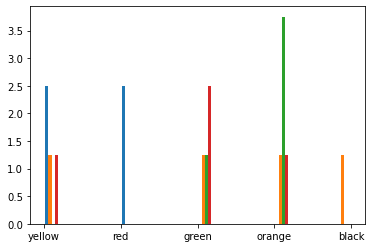

In [31]:
colours = ["green", "red", "yellow","black","orange"]

results = rng.choice (colours, size= (4,4)) # using choice to create a 4x4 array of colours using random choice
count, bins, ignored = plt.hist(results, 20, density = True ) # create a histogram to visual see the colour randomly choosen of each colour
plt.show()

In [32]:
colours = ["green", "red", "yellow","black","orange"]
#Setting user-specified probabilities through p uses a more general but less efficient sampler than the default. 
#The general sampler produces a different sample than the optimized sampler even if each element of p is 1 / len(a).
rng.choice(colours, 5, p=[0.5, 0.1, 0.1, 0.2,0.1])
#rng.choice(colours, size=(4,4))


array(['green', 'yellow', 'yellow', 'green', 'black'], dtype='<U6')

[1 4 0 3]


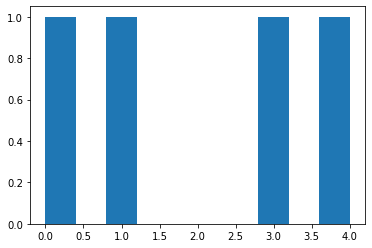

In [33]:
#Generate a non-uniform random sample from np.arange(5) of size 3:
x=rng.choice(5, 4, replace=False)#p=[0.1, 0, 0.3, 0.6, 0])
print(x)
plt.hist(x)
plt.show()

In [34]:
#Generate a uniform random sample from np.arange(5) of size 3 without replacement:
rng.choice(5, 3, replace=False)
#This is equivalent to rng.permutation(np.arange(5))[:3]

array([2, 3, 1], dtype=int64)

In [35]:
#Generate a uniform random sample from a 2-D array along the first axis (the default), without replacement:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 2, replace=False)

array([[0, 1, 2],
       [6, 7, 8]])

<br>

### Paper, Rock or Scissors Game using random choice

***
This is a very simple way to put the random.choice method into action. A game we are all hopefully farmiliar with.[12]


In [115]:


user_action = input("Enter a choice (rock, paper, scissors): ") # first question to prompt user to select a variable
possible_actions = ["rock", "paper", "scissors"] # possible selections of the user
computer_action = rng.choice(possible_actions) # using rng.choice the comp will randomly slect one of the possible variables in the array
print(f"\nYou chose {user_action}, computer chose {computer_action}.\n") #Now that both players have made their choice, you just need a way to decide who wins. 
if user_action == computer_action: #Using an if … elif … else block, you can compare players’ choices and determine a winner:
    print(f"Both players selected {user_action}. It's a tie!") # by comparing the tie condition first you eliminate quite a few possible actions (3 to be exact)
elif user_action == "rock":
    if computer_action == "scissors":
        print("Rock smashes scissors! You win!")
    else:
        print("Paper covers rock! You lose.")
elif user_action == "paper":
    if computer_action == "rock":
        print("Paper covers rock! You win!")
    else:
        print("Scissors cuts paper! You lose.")
elif user_action == "scissors":
    if computer_action == "paper":
        print("Scissors cuts paper! You win!")
    else:
        print("Rock smashes scissors! You lose.") 
                 
# by comparing the tie condition first you need only write the elif/if/else block for the other six possible outcomes.    

Enter a choice (rock, paper, scissors):  rock



You chose rock, computer chose rock.

Both players selected rock. It's a tie!


### Simple Random Data Method 3- Bytes

In [37]:
np.random.default_rng().bytes(200)

b'p\xd0\xa3eo\xdbq\xa3a\xdcG\xa5\xec\n\xbcV\xb6\xc5y\xd7\xa1\x88ka\xac["\xee\x8c\xddn\xa3o~\xb3\xbe\x92or\x06\x14\xd1Z\xf8\xbe\n1\x009\xd9\x0eV\x10\xfc\xc61n\x1d\x15\xd5\xe1\xfb\xe5nd\\\x0bCY\x81\xcbI\x940\xa4\xdb\xabm \xf0o\xb7\x87\xaf\x97m05\x11\xc4\x97\xbb\x0c\xdfD\x96V\x9eZGs\xfbY2\xee\xf1\xd4m\xbf\x14\xe4\x9d\xeb\xbc\x82\xb1\xbe-\xb9\xf4O\x93\xac\xb0\x03\x9e1\xab&\xecI0 \'\xae\xf6"J\xb3\xd9\xb4\x1a\xd2\x8a?gG2\xcdZ5\xc9\xcc\x00\xca\x0f\x1ab\xb7V\x1ff\x0f\x02\xb3P\xe0\xca<\xad\x19\xa6\xcd4gI\xd0\x19\xbe84\xdaIfA\xea\xed\xe1\x0e\'r7f\x1f;\\\xddQ\xfbs'

<br>

# Permutations

***

The methods for randomly permuting a sequence are

- shuffle(x[, axis]): Modify an array or sequence in-place by shuffling its contents.

- permutation(x[, axis]):Randomly permute a sequence, or return a permuted range.

- permuted(x[, axis, out]): Randomly permute x along axis axis.

A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.

The main difference between Generator.shuffle and Generator.permutation is that Generator.shuffle operates in-place, while Generator.permutation returns a copy.[13]


In [38]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [39]:
y = rng.permuted(x, axis=1, out=x)


In [40]:
x

array([[ 2,  1,  3,  0,  4],
       [ 8,  5,  7,  6,  9],
       [14, 12, 11, 10, 13]])

In [41]:
y # this is the same output for x and y. 

array([[ 2,  1,  3,  0,  4],
       [ 8,  5,  7,  6,  9],
       [14, 12, 11, 10, 13]])

In [42]:
y is x

True

Handling the axis parameter
An important distinction for these methods is how they handle the axis parameter. Both Generator.shuffle and Generator.permutation treat the input as a one-dimensional sequence, and the axis parameter determines which dimension of the input array to use as the sequence. In the case of a two-dimensional array, axis=0 will, in effect, rearrange the rows of the array, and axis=1 will rearrange the columns. 

In [43]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [44]:
rng.permutation(x, axis=1) # rearrange the columns.

array([[ 2,  3,  0,  4,  1],
       [ 7,  8,  5,  9,  6],
       [12, 13, 10, 14, 11]])

In [45]:
rng.permutation(x, axis=0) #axis = 0 has rearranged the rows while axis = 1 will rearrange the columns. The columns have been rearranged in bulk
#values within the columns have not changed 

array([[ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

<br>

The method Generator.permuted treats the axis parameter similar to how numpy.sort treats it. Each slice along the given axis is shuffled independently of the others. Compare the following example of the use of Generator.permuted to the above example of Generator.permutation:

In [46]:
rng.permuted(x, axis=1) # when permuted in run the entire array permuted and columns along with rows are changed.

array([[ 3,  1,  2,  0,  4],
       [ 7,  9,  5,  8,  6],
       [12, 14, 13, 11, 10]])

In [47]:
arr= [2,5,9,8,6,8,9]
result = rng.permutation(arr)
result # input is an array the output is a permuted array of the numbers 

array([9, 6, 5, 9, 2, 8, 8])

In [48]:
arr1 = np.arange(16).reshape((4,4))
result1 = rng.permutation(arr1)
arr2 = np.arange(16).reshape((4,4))
result2 = rng.permuted(arr2)
print(result1)

print(result2)

[[12 13 14 15]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[14  9 12 13]
 [ 8  4 10  2]
 [ 6  7  5 11]
 [ 3 15  1  0]]


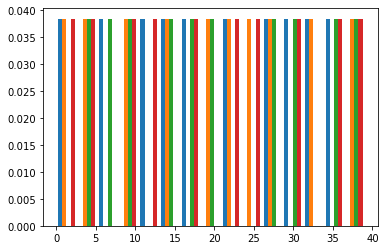

In [49]:
arr1 = np.arange(40). reshape((10,4))
arr = rng.permuted(arr1, axis=1)
c,bin, ig =plt.hist(arr, 15, density =True)
plt.show()

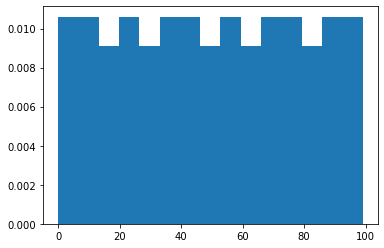

In [50]:
arr = np.random.permutation(100)
   
c, bin, ig = plt.hist(arr, 15, density = True)
plt.show()

In [51]:
#using the permutation function with pandas module[14]
raw_data = {"county": ["Cavan", "Meath","Leitrim","Dublin","Kildare","Louth"], "Rank": ["1st","2nd","3rd","4th","5th","6th"], "CovidCases":["26","99","45","189","145","99"]
            , "CovidDeaths": ["2","4","1","20","12","8"]}

df= pd.DataFrame(raw_data, index = pd.Index (["A","B","C","D","E","F",], name = "letter"),
                columns = pd.Index (["county","Rank","CovidCases","CovidDeaths"], name = "attributes"))

In [52]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [53]:
nrows= df.shape[0] # this will give us back the number of rows

In [54]:
b = rng.permutation (nrows)

In [55]:
b # will give back a permutated sequence of the number of rows in an array

array([1, 4, 2, 3, 5, 0])

In [56]:
df.take(b) # takes the indices and changes the orders of the rows to the indices that we pass it

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
B,Meath,2nd,99,4
E,Kildare,5th,145,12
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
F,Louth,6th,99,8
A,Cavan,1st,26,2


In [57]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', name='letter')

In [58]:
#we can randomize this list of letters 
rng.permutation(df.index)

array(['B', 'D', 'E', 'F', 'C', 'A'], dtype=object)

In [59]:
df.reindex(rng.permutation(df.index))

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
B,Meath,2nd,99,4
F,Louth,6th,99,8
A,Cavan,1st,26,2


In [60]:
df.sample(n=nrows)

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
E,Kildare,5th,145,12
F,Louth,6th,99,8
D,Dublin,4th,189,20
A,Cavan,1st,26,2
C,Leitrim,3rd,45,1
B,Meath,2nd,99,4


In [61]:
s = df['county']
len(s) #length of city coulumn

6

In [62]:
rng.permutation(len(s))

array([2, 5, 3, 0, 4, 1])

In [63]:
r_entries=rng.permutation(len(s))

In [64]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [65]:
s[r_entries]

letter
F      Louth
E    Kildare
D     Dublin
A      Cavan
B      Meath
C    Leitrim
Name: county, dtype: object

In [66]:
s[r_entries].values

array(['Louth', 'Kildare', 'Dublin', 'Cavan', 'Meath', 'Leitrim'],
      dtype=object)

In [67]:
df['county']=s[r_entries].values

In [68]:
df #you can see now the county column has been randomised 

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Louth,1st,26,2
B,Kildare,2nd,99,4
C,Dublin,3rd,45,1
D,Cavan,4th,189,20
E,Meath,5th,145,12
F,Leitrim,6th,99,8


<br>

Generator.shuffle works on non-NumPy sequences. That is, if it is given a sequence that is not a NumPy array, it shuffles that sequence in-place.

In [69]:
a = ['A', 'B', 'C', 'D', 'E']
rng.shuffle(a)
a


['D', 'B', 'C', 'E', 'A']

<br>
The shuffle() method returns the modified form of the original sequence.[15] As can be seen by the code below the original sequence gets shuffled, no new sequence is returned by the method.


In [70]:
# Making a list of integers
samples = [10, 20, 30, 40, 50, 60]

# Converting  the list into a numpy array
seq = np.array(samples)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)

Original order of the sequence is : [10 20 30 40 50 60]

Output sequence obtained after shuffling is:  [50 10 60 30 40 20]


<br>
In the below code example, a multi-dimensional array of shape 3X3 was made as an original sequence that contains few random integer values.
We can view the order of the elements of the original sequence by printing its content. Then, this sequence is passed as the only parameter inside the numpy.random.shuffle() to modify its content. The shuffle() method returns a shuffled sequence, and it could be verified by printing the order of elements in the modified sequence that the sub-arrays get shuffled only along its first axis, i.e., in rows.
Also, the content stored inside the sub-arrays remains in the same order, and they don’t get shuffled.

In [71]:
# Making original sequence of multi-dimensional array
seq = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Printing the shape of multi-dimensional array
print("Shape of original sequence is: ", seq.shape)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)
print("Shape of shuffled sequence is: ", seq.shape)

Shape of original sequence is:  (3, 3)
Original order of the sequence is : [[9 8 7]
 [6 5 4]
 [3 2 1]]

Output sequence obtained after shuffling is:  [[9 8 7]
 [3 2 1]
 [6 5 4]]
Shape of shuffled sequence is:  (3, 3)


In [72]:
#Let us pass a 3-dimensional array to the rng.shuffle method.
#https://www.blogarama.com/technology-blogs/1302264-likegeeks-blog/38775926-amazing-numpy-shuffle-examples
x = 5 * rng.random((4,3,3)) - 100

print(f"x:\n{x}\n")

rng.shuffle(x) 

print(f"shuffled x:\n{x}")

x:
[[[-96.56707747 -97.14352181 -98.46037143]
  [-97.84510669 -95.84502961 -95.95719056]
  [-95.88082522 -97.70205416 -96.43851297]]

 [[-96.48932903 -99.10336494 -96.00396745]
  [-99.08091462 -95.36091453 -95.58275197]
  [-98.38116052 -99.43233416 -99.15330537]]

 [[-97.2207957  -96.88625955 -98.57516872]
  [-95.72276796 -95.37374928 -96.16141518]
  [-96.03200751 -97.51077755 -99.32572544]]

 [[-96.34129153 -95.89951413 -99.63901469]
  [-96.89162664 -98.42783245 -97.83308818]
  [-99.67203737 -95.4162256  -99.01680176]]]

shuffled x:
[[[-96.34129153 -95.89951413 -99.63901469]
  [-96.89162664 -98.42783245 -97.83308818]
  [-99.67203737 -95.4162256  -99.01680176]]

 [[-97.2207957  -96.88625955 -98.57516872]
  [-95.72276796 -95.37374928 -96.16141518]
  [-96.03200751 -97.51077755 -99.32572544]]

 [[-96.48932903 -99.10336494 -96.00396745]
  [-99.08091462 -95.36091453 -95.58275197]
  [-98.38116052 -99.43233416 -99.15330537]]

 [[-96.56707747 -97.14352181 -98.46037143]
  [-97.84510669 -95.8450

<br>

## Probability Distributions 

***
Probability distributions are statistical functions that describe the likelihood of obtaining possible values that a random variable can take. In other words, the values of the variable vary based on the underlying probability distribution.

Suppose you draw a random sample and measure the heights of the subjects. As you measure heights, you create a distribution of heights. This type of distribution is useful when you need to know which outcomes are most likely, the spread of potential values, and the likelihood of different results.

Probability distributions indicate the likelihood of an event or outcome. Statisticians use the following notation to describe probabilities:

p(x) = the likelihood that random variable takes a specific value of x.

The sum of all probabilities for all possible values must equal 1. Furthermore, the probability for a particular value or range of values must be between 0 and 1.

Probability distributions describe the dispersion of the values of a random variable. Consequently, the kind of variable determines the type of probability distribution. For a single random variable, statisticians divide distributions into the following two types:

1) Discrete probability distributions for **discrete variables**:

There are a variety of discrete probability distributions that you can use to model different types of data. The correct discrete distribution depends on the properties of your data. For example, use the:

Binomial distribution to model binary data, such as coin tosses.
Poisson distribution to model count data, such as the count of library book checkouts per hour.
Uniform distribution to model multiple events with the same probability, such as rolling a die.

2) Probability density functions for **continuous variables**:

Continuous probability functions are also known as probability density functions. You know that you have a continuous distribution if the variable can assume an infinite number of values between any two values. 

There are a variety of probability distributions for continuous data. These distributions include the following:
- The most well-known continuous distribution is the normal distribution, which is also known as the Gaussian distribution or the “bell curve.” This symmetric distribution fits a wide variety of phenomena, such as human height and IQ scores. It has two parameters—the mean and the standard deviation
- Weibull distribution: A particularly versatile distribution that analysts use in many settings. Can model left- and right-skewed data and approximate the normal distribution.
- Exponential distribution: Models variables in which small values occur more frequently than higher values. Use to model the amount of time between independent events.
- Gamma distribution: Models right-skewed distributions. Use to model the time until the kth event, where k is the shape parameter.
- Uniform distribution: Models symmetric, continuous data where all equal sized ranges have the same probability.

You can use equations and tables of variable values and probabilities to represent a probability distribution. 


<br>

### Binomial Distributions

***
The binomial distribution is a common discrete distribution used in statistics, as opposed to a continuous distribution, such as the normal distribution. This is because the binomial distribution only counts two states, typically represented as 1 (for a success) or 0 (for a failure) given a number of trials in the data. The binomial distribution thus represents the probability for x successes in n trials, given a success probability p for each trial.

The binomial distribution is often used in social science statistics as a building block for models for dichotomous outcome variables, like whether a Republican or Democrat will win an upcoming election or whether an individual will die within a specified period of time, etc.


The **probability mass function (pmf)** of binomial distribution is defined as:

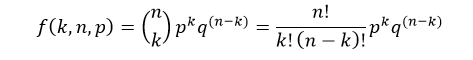


Binomial Distribution
Where,
- p is the probability of success in each trial
- q is the probability of failure in each trial, q = 1 - p
- n is number of trials
- k is the number of successes which can occur anywhere among the n trials

An binomial distribution has mean np and variance npq.

The cumulative distribution function (cdf) evaluated at k, is the probability that the random variable (X) will take a value less than or equal to k. The cdf of binomial distribution is defined as:
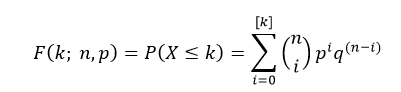



Where, [k] is the greatest integer less than or equal to k.

The NumPy random.binomial() function returns random samples from a binomial distribution.

In [117]:
#In the example below, random.binomial() function is used to create a matrix of given shape containing random values drawn from specified binomial distribution (16)
size = (5,3)
sample = rng.binomial(20, 0.5, size) # using shift+tab will give me the docstring to show parameters and returns
sample

array([[10,  6,  7],
       [11, 11, 11],
       [ 9, 16, 15],
       [11, 11, 11],
       [ 9,  8, 11]], dtype=int64)

<br>

### Binomial Distribution when tossing a coin:

Probability of getting the number of heads while tossing a coin 20 times; Here, the random variable X is the number of “successes” that is the number of times heads occurs. The probability of getting a heads is 0.5. The diagram below represents the binomial distribution for 10000 experiments.

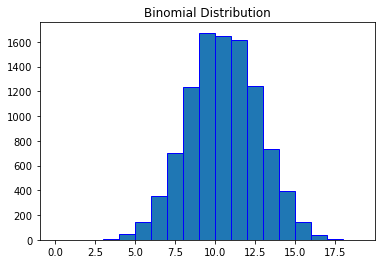

In [152]:
#plot the probability mass function (pmf) of binomial distribution using hist() function.
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 10000 # number of experiments 
sample = rng.binomial(20, 0.5, size) 
bin = np.arange(0,20,1)
#print(sample)
plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Binomial Distribution") 
plt.show()

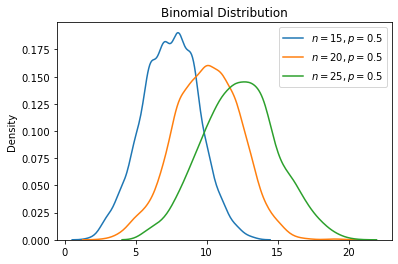

In [122]:
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.kdeplot(np.random.binomial(15, 0.5, size))
sns.kdeplot(np.random.binomial(20, 0.5, size))
sns.kdeplot(np.random.binomial(25, 0.5, size))
plt.title("Binomial Distribution")
plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

<br>

Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three binomial distributions (each with different number of trials but same probability of success) are compared.[16]

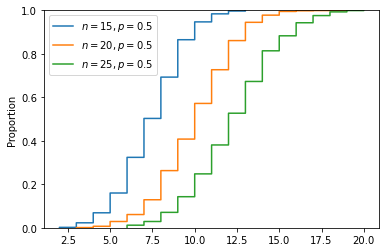

In [76]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.ecdfplot(np.random.binomial(15, 0.5, size))
sns.ecdfplot(np.random.binomial(20, 0.5, size))
sns.ecdfplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

<br>

### Binomial Distribution and Scipy Library.

You can also answer questions about binomial probabilities by using the binom function from the scipy library

It is known that 70% of individuals support a certain law. If 10 individuals are randomly selected, what is the probability that between 4 and 6 of them support the law.
The below probability of between 4 and 6 people supporting the law is 33.9%.

In [131]:
from scipy.stats import binom

#calculate binomial probability
binom.cdf(k=6, n=10, p=0.7) - binom.cdf(k=3, n=10, p=0.7)


0.3397972032000002

In [132]:
#calculate binomial probability
binom.cdf(k=6, n=9, p=0.8)

0.261802496

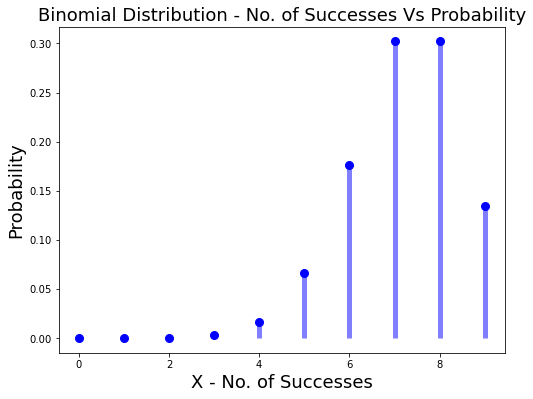

In [125]:
#https://vitalflux.com/binomial-distribution-with-python-code-examples/
#https://vitalflux.com/binomial-distribution-defined-with-10-examples/
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
# 80% of people who purchase pet insurance are women.  If 9 pet insurance owners are randomly selected, find the probability that exactly 6 are women.
# X = Discrete random variable representing number of successes
# p = Probability of the success
#
X = np.arange(0,10)
p = 0.8
n = 9
#
# Calculate binomial probability distribution
#
binom_pd = binom.pmf(X, n, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, binom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Successes", fontsize="18")
plt.title("Binomial Distribution - No. of Successes Vs Probability", fontsize="18")
ax.vlines(X, 0, binom_pd, colors='b', lw=5, alpha=0.5)
plt.show()

No. of correct answers from multiple-choice questions: Probability of getting right answers out of 20 multiple-choice questions when one out of 4 options were chosen arbitrarily. Here, the random variable X is the number of “successes” that is the number of right answers. Let’s say, the probability/proportion of an answer being right is 1/4 or 0.25 or 25%. The binomial distribution could be represented as B(20,0.25)

In [79]:
# ref: https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.binomial.html
n, p = 20, .25  # number of trials, probability of each trial
size = 1000
s = rng.binomial(n, p, size)

# lets check the probability of 8 answers being corrected selected in the multiple choice questioneaire and simulate the trail 20000 times
sum(rng.binomial(20, 0.25, 20000) == 8)/20000.
# there is a 0.06225% chance of 8 answers being correct or 6.225% chance

0.05955

In [80]:
#ref https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
# check what the ditribution is of no of answers being correct. With probability of 0.25 the average correct amount of answers is 5 out of twenty. 
# example of using the pmf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.25
k = 20
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(0, 21, 1):
	print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))



P of 0 success: 0.317%
P of 1 success: 2.114%
P of 2 success: 6.695%
P of 3 success: 13.390%
P of 4 success: 18.969%
P of 5 success: 20.233%
P of 6 success: 16.861%
P of 7 success: 11.241%
P of 8 success: 6.089%
P of 9 success: 2.706%
P of 10 success: 0.992%
P of 11 success: 0.301%
P of 12 success: 0.075%
P of 13 success: 0.015%
P of 14 success: 0.003%
P of 15 success: 0.000%
P of 16 success: 0.000%
P of 17 success: 0.000%
P of 18 success: 0.000%
P of 19 success: 0.000%
P of 20 success: 0.000%


<br>

### The Chisquare Distribution

***

When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square (see Notes). This distribution is often used in hypothesis testing.

It is used for statistical tests where the test statistic follows a Chi-squared distribution. Two common tests that rely on the Chi-square distribution are the Chi-square goodness of fit test and the Chi-square test of independence.




In [81]:
np.random.default_rng().chisquare(3,4)

array([10.20371644,  1.55709727,  1.1414096 ,  0.514623  ])

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


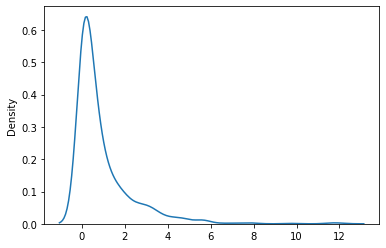

In [82]:
sns.distplot(np.random.default_rng().chisquare(df=1, size=1000), hist=False)

plt.show()

No handles with labels found to put in legend.


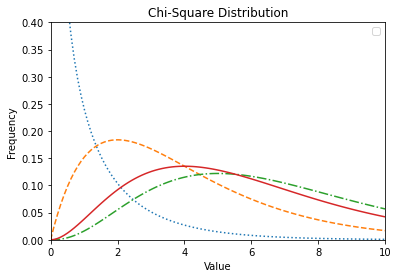

In [83]:
#https://github.com/ikhomkodes/ChiSquare-Test-in-5-different-languages/blob/main/ChiSquareTest.ipynb

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

In [84]:
observed_values=[300,300,100,200,100]
expected_values= [600, 210, 140, 30, 20]
t = stats.chisquare([300,300,100,200,100],f_exp= [600, 210, 140, 30, 20])
print("Chisquare is",t)

Chisquare is Power_divergenceResult(statistic=1483.3333333333333, pvalue=0.0)


In [85]:
#https://wtmatter.com/numpy-chi-square-distribution/
#https://www.geeksforgeeks.org/numpy-random-chisquare-in-python/
#ref:https://github.com/BundleOfKent/Pearson-s-chi-squared-test-from-scratch/blob/master/Chi-squaredFromScratch_Medium.ipynb
#ref: https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/
# ref:https://medium.com/analytics-vidhya/pearsons-chi-squared-test-from-scratch-with-python-ba9e14d336c
#https://github.com/funkaj1981/chisquare_function/blob/master/chi2.ipynb
# https://allusesof.com/math/20-uses-of-the-chi-square-test/

<br>


### The Normal Distribution in Numpy Random:

***


The NumPy random normal() function is used to gets the random samples from a normal distribution. The NumPy random normal() function is a built-in function in NumPy package of python. The NumPy random normal() function generate random samples from a normal distribution or Gaussian distribution, the normal distribution describes a common occurring distribution of samples influenced by a large of tiny, random distribution or which occurs often in nature. The normal distribution also called a bell curve because of its shape and these samples of distribution are commonly used in data statistics, data analysis, data-related fields, and all and also can be used in probability, machine learning, Bayesian statistics, and all. It is the most important distribution.




In [86]:
help(random.Generator.normal)
# this code will tell me about the parameters,returns and also includes some examples to practice with.

Help on method_descriptor:

normal(...)
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution. Must be
        non-negative.
    size : int or tuple of ints, optional
        Output shape.  If the give

In [87]:
3 + 2.5 * np.random.standard_normal(size=(2, 4))

array([[0.02025416, 7.55529275, 4.98894105, 8.00939977],
       [0.84043725, 6.78050827, 0.12837609, 2.2769493 ]])

In [88]:
dir(random.Generator.normal)
# this command will let me see what is in the random normal directory in numpy 

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__objclass__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


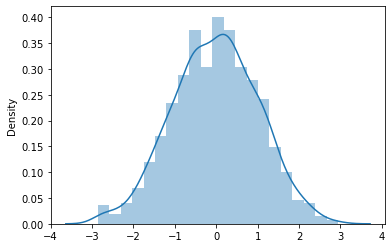

In [89]:
sns.distplot(np.random.standard_normal(size=1000), hist=True)

plt.show()

 

The np.random.normal function has three primary parameters that control the output: loc, scale, and size.
The loc parameter controls the mean of the function.
The scale parameter controls the standard deviation of the normal distribution.
The size parameter controls the size and shape of the output.


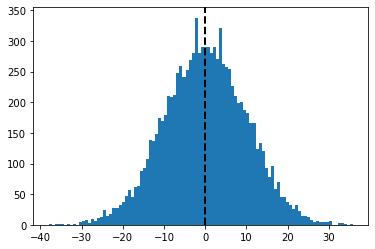

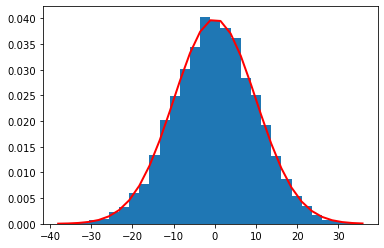

In [90]:
# mean
pos = 0
 
# standard deviation
scale = 10
 
# size number of points
size = 10000 
 
 
# random seed
np.random.seed(10)
 
# creating a normal distribution data
values = np.random.default_rng().normal(pos, scale ,size)
 
# plotting histograph
plt.hist(values, 100)
 
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
 
# showing the plot
plt.show()
# Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(values, 30, density=True)
plt.plot(bins, 1/(scale * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - pos)**2 / (2 * scale**2) ),
         linewidth=2, color='r')
plt.show()


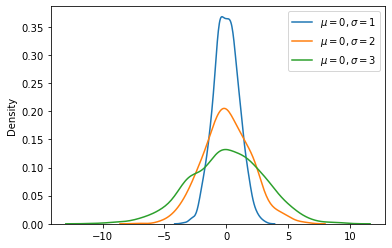

In [91]:
#https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php
#Multiple probability density functions can be compared graphically using Seaborn kdeplot() function. 
#In the example below, pdf of three normal distributions (each with mean 0 and standard deviation 1, 2 and 3 respectively) are compared.
# The below is code for normal distribution with the same mean but difference in standard deviation
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(0, 2, size))
sns.kdeplot(np.random.default_rng().normal(0, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 0, \sigma = 2$", 
            r"$\mu = 0, \sigma = 3$"])
plt.show()

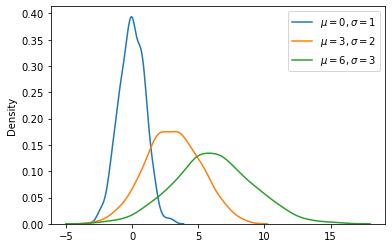

In [92]:
#Three normal distributions each with different mean and standard deviations are graphically compared.
#ref :https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(3, 2, size))
sns.kdeplot(np.random.default_rng().normal(6, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 3, \sigma = 2$", 
            r"$\mu = 6, \sigma = 3$"])
plt.show()

<br>

### The uniform distribution in NumPy Random:

***
In statistics, uniform distribution is a term used to describe a form of probability distribution where every possible outcome has an equal likelihood of happening. The probability is constant since each variable has equal chances of being the outcome.

Discrete uniform distributions have a finite number of outcomes. A continuous uniform distribution is a statistical distribution with an infinite number of equally likely measurable values.

The concepts of discrete uniform distribution and continuous uniform distribution, as well as the random variables they describe, are the foundations of statistical analysis and probability theory.

For example, if you stand on a street corner and start to randomly hand a $100 bill to any lucky person who walked by, then every passerby would have an equal chance of being handed the money. The percentage of the probability is 1 divided by the total number of outcomes (number of passersby). However, if you favored short people or women, they would have a higher chance of being given the $100 bill than the other passersby. It would not be described as uniform probability.

A deck of cards also has a uniform distribution. This is because an individual has an equal chance of drawing a spade, a heart, a club, or a diamond. Another example of a uniform distribution is when a coin is tossed. The likelihood of getting a tail or head is the same. The graph of a uniform distribution is usually flat, whereby the sides and top are parallel to the x- and y-axes.

1. Discrete uniform distribution
In statistics and probability theory, a discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. A good example of a discrete uniform distribution would be the possible outcomes of rolling a 6-sided die. The possible values would be 1, 2, 3, 4, 5, or 6. In this case, each of the six numbers has an equal chance of appearing. Therefore, each time the 6-sided die is thrown, each side has a chance of 1/6.

The number of values is finite. It is impossible to get a value of 1.3, 4.2, or 5.7 when rolling a fair die. However, if another die is added and they are both thrown, the distribution that results is no longer uniform because the probability of the sums is not equal. Another simple example is the probability distribution of a coin being flipped. The possible outcomes in such a scenario can only be two. Therefore, the finite value is 2.

There are several ways in which discrete uniform distribution can be valuable for businesses. For example, it can arise in inventory management in the study of the frequency of inventory sales. It can provide a probability distribution that can guide the business on how to properly allocate the inventory for the best use of square footage.

Discrete uniform distribution is also useful in Monte Carlo simulation. This is a modeling technique that uses programmed technology to identify the probabilities of different outcomes. Monte Carlo simulation is often used to forecast scenarios and help in the identification of risks.

 

2. Continuous uniform distribution
Not all uniform distributions are discrete; some are continuous. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. Unlike discrete random variables, a continuous random variable can take any real value within a specified range.

A continuous uniform distribution usually comes in a rectangular shape. A good example of a continuous uniform distribution is an idealized random number generator. With continuous uniform distribution, just like discrete uniform distribution, every variable has an equal chance of happening. However, there is an infinite number of points that can exist.

In [93]:
# ref: https://www.investopedia.com/terms/u/uniform-distribution.asp#:~:text=Uniform%20distributions%20are%20probability%20distributions%20with%20equally%20likely,a%20continuous%20distribution%2C%20outcomes%20are%20continuous%20and%20infinite.
# ref: https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
# ref : https://www.alphacodingskills.com/numpy/numpy-uniform-distribution.php
# ref : https://wtmatter.com/numpy-uniform-distribution/
# ref: https://www.datacamp.com/community/tutorials/probability-distributions-python

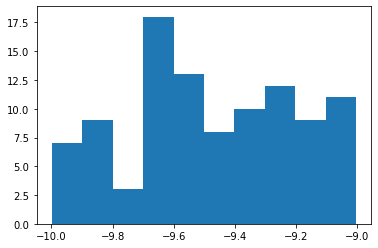

In [153]:
s = np.random.default_rng().uniform(-10,-9,100)
plt.hist(s)
plt.show()

In [95]:
s

array([-9.61574305, -9.30617536, -9.8065405 , -9.92106707, -9.2965146 ,
       -9.49679836, -9.76715701, -9.26001257, -9.02905753, -9.52089738,
       -9.38978401, -9.8497069 , -9.27262872, -9.37722483, -9.89414559,
       -9.89178453, -9.75330755, -9.80499693, -9.7234259 , -9.9584192 ,
       -9.57910781, -9.66678423, -9.55306139, -9.88043787, -9.73465257,
       -9.39586041, -9.4979754 , -9.63975697, -9.87175571, -9.84261282,
       -9.97345499, -9.39567551, -9.21395053, -9.96690176, -9.97237249,
       -9.60629569, -9.80602565, -9.71399482, -9.73715312, -9.32273998,
       -9.06024042, -9.03571902, -9.21827535, -9.44006923, -9.80048458,
       -9.66235826, -9.58971268, -9.2333808 , -9.53633735, -9.57673532,
       -9.47895863, -9.43775674, -9.21082414, -9.48446349, -9.29182414,
       -9.87242536, -9.10127516, -9.31083389, -9.22839611, -9.61654485,
       -9.37008321, -9.01239073, -9.47827579, -9.10109001, -9.52483657,
       -9.84697926, -9.48340939, -9.70690402, -9.05676105, -9.00

In [96]:
#All values are within the given interval:
np.all(s <= -12)

False

In [97]:
np.all(s < 0)

True

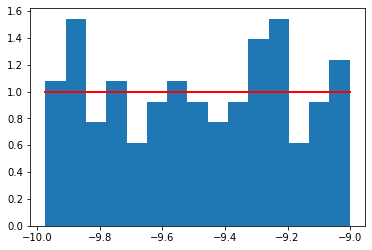

In [98]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

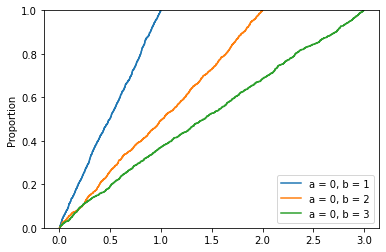

In [99]:
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different uniform distribution
sns.ecdfplot(np.random.uniform(0, 1, size))
sns.ecdfplot(np.random.uniform(0, 2, size))
sns.ecdfplot(np.random.uniform(0, 3, size))

plt.legend(["a = 0, b = 1", 
            "a = 0, b = 2", 
            "a = 0, b = 3"])
plt.show()

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


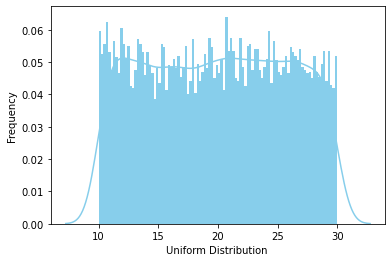

In [100]:
# import uniform distribution. We can use the scipy module which has a built in uniform function 
from scipy.stats import uniform
import seaborn as sns 

# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

<br>

### The Monte Carlo Simulation Using numpy random

***

The Monte Carlo method is a data analysis technique used in cases where there’s an intervention of random variables. It was invented during the second World War to improve decision-making under highly uncertain conditions. A Monte Carlo simulation is named as such after the famous casino district of  Monaco, because the element of ‘luck’ or ‘chance’ is inherent to the modeling approach here. Monte Carlo simulations use multiple values to replace uncertain variables, instead of just replacing them with a simple average—a ‘soft’ analysis method that doesn’t quite give accurate results. 

Businesses often deal with uncertain variables that can impact important outcomes. The Monte Carlo simulation can be used to mitigate risks by predicting the likelihood of these outcomes.

Artificial intelligence, stock prices, sales forecasting, project management, and pricing are just a few of Monte Carlo simulations’ many functions. Monte Carlo simulations can also be used to conduct sensitivity analysis and calculate the correlation of inputs.

ref: https://careerfoundry.com/en/blog/data-analytics/monte-carlo-method/#monte-carlo-machine-learning
ref: https://machinelearningmastery.com/monte-carlo-sampling-for-probability/
ref :https://pbpython.com/monte-carlo.html

<br>

## The Poisson Distribution

***

Poisson Distribution is a Discrete Distribution (will only take a discrete number of values).

It estimates how many times an event can happen in a specified time. e.g. If someone eats twice a day what is probability he will eat thrice?

It has two parameters:

lam - rate or known number of occurences e.g. 2 for above problem.

size - The shape of the returned array.

Basically, it is used to predict the probability of certain events happening if we know how often the event has occurred.

(array([ 415., 2281., 1708., 3218., 1065., 1004.,  250.,   39.,   15.,
           5.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

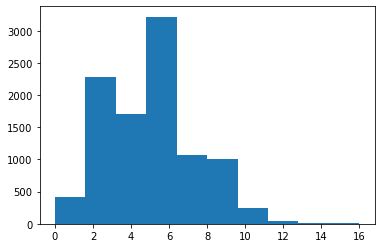

In [101]:
# generate a random 
import numpy as np
rng = np.random.default_rng()
s = rng.poisson(5, 10000)
plt.hist(s)

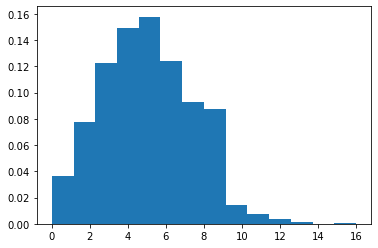

In [102]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


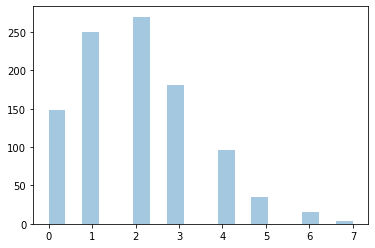

In [103]:
sns.distplot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

Normal distribution is continous whereas poisson is discrete.

But we can see that similar to binomial for a large enough poisson distribution it will become similar to normal distribution with certain std dev and mean.

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


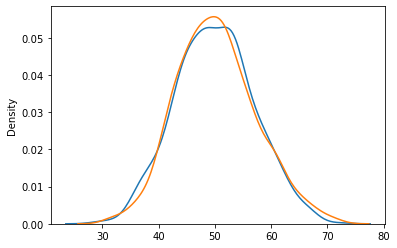

In [104]:
# ref: https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=False, label='poisson')

plt.show()

Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three poisson distributions (each with different λ) are compared.



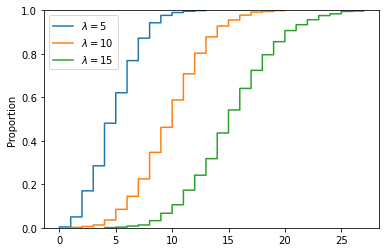

In [105]:
#ref https://www.alphacodingskills.com/numpy/numpy-poisson-distribution.php
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different poisson distribution
sns.ecdfplot(np.random.poisson(5, size))
sns.ecdfplot(np.random.poisson(10, size))
sns.ecdfplot(np.random.poisson(15, size))

plt.legend([r"$\lambda = 5$", 
            r"$\lambda = 10$", 
            r"$\lambda = 15$"])
plt.show()

Draw an equal amount of samples for two different values of lam, simultaneously. In this example, we shall be drawing 20 different sample values for two values of lam: λ = 10 and λ = 100. We will be passing lam argument in the form of (10,100).


[[ 13 104]
 [ 10  90]
 [  6 110]
 [ 12 117]
 [ 10  96]
 [  9 103]
 [ 11 110]
 [ 15  84]
 [ 10  90]
 [  8  94]
 [  8  97]
 [ 13  97]
 [ 13 103]
 [ 10  74]
 [  4  95]
 [  8  95]
 [ 14 114]
 [ 11 103]
 [  8  94]
 [ 10  99]]


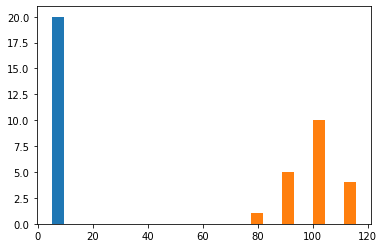

In [106]:
#ref: https://www.pythonpool.com/numpy-random-poisson/
np.random.seed(10)
k = np.random.poisson((10, 100), (20,2))

print(k)

plt.hist(k)

plt.show()

https://www.investopedia.com/terms/p/poisson-distribution.asp

<br>

## Explain the use of seeds in generating pseudorandom numbers.

***

NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.

Pseudo-random numbers are numbers that appear to be random, but are not actually random.
There’s a fundamental problem when using computers to simulate or work with random processes.Computers are completely deterministic, not random. Another way of saying this is that if you give a computer a certain input, it will precisely follow instructions to produce an output. Essentially, the behavior of computers is NOT random.Computers solve the problem of generating “random” numbers the same way that they solve essentially everything: with an algorithm.Computer scientists have created a set of algorithms for creating psuedo random numbers, called “pseudo-random number generators.”These algorithms can be executed on a computer.As such, they are completely deterministic. However, the numbers that they produce have properties that approximate the properties of random numbers.

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributionS. Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. It exposes many different probability distributions.The legacy RandomState random number routines are still available, but limited to a single BitGenerator.By default, Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState.  

Seeds can be passed to any of the BitGenerators. The provided value is mixed via SeedSequence to spread a possible sequence of seeds across a wider range of initialization states for the BitGenerator. 
The numpy.random.seed function provides the input (i.e., the seed) to the algorithm that generates pseudo-random numbers in NumPy.If you give a pseudo-random number generator the same input, you’ll get the same output. In order to get repeatable results when we are using “random” functions in NumPy, we need to use numpy.random.seed.

In [107]:
# Lets compare numbers generated using a seed and not using a seed. The below code does not have a seed. It will generate seemingly pseudorandom numbers every time the code is run.
rng.random()

0.9885396243906327

In [108]:
# The seed has been set in the below code as 10. Everytime this code is run the random pseudonumber will remain the same.
rng = default_rng(10)
rng.random()

0.9560017096289753

In [109]:
rng=default_rng(5)
rng.integers(4)

2

In [110]:
rng.integers(4)

3

In [111]:
rng = default_rng(0) # we have set the seed here to zero. The code will generate the same number each time the cell is run.
x=[]
for i in range (2):
    a = rng.integers(1,6)
    x.append(a)
print(x)   

[5, 4]


In [112]:
# if we imput the same formula below without setting the rng(random number generator) with a seed number the number will change each time code is ran
x=[]
for i in range (2):
    a = rng.integers(1,6)
    x.append(a)
print(x) 

[3, 2]


## Backround Information on NumPy (5)

https://www.youtube.com/watch?v=ZB7BZMhfPgk Introduction to Numerical Computing with NumPy | SciPy 2019 Tutorial 1.13.00


### References:
[1] [API Reference Random sampling](https://numpy.org/devdocs/user/whatisnumpy.html)
[2] [Find the best 64-bit Simulation PRNG](https://nullprogram.com/blog/2017/09/21/)
[3] [PCG, A Family of Better Random Number Generators](https://www.pcg-random.org/)
[4] [Pseudo Random Number Generator (PRNG)](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/)
[5] [What is the difference between CSPRNG and PRNG?](https://crypto.stackexchange.com/questions/12436/what-is-the-difference-between-csprng-and-prng)
[6] [Python NumPy | Random](https://www.bing.com/videos/search?q=numpy.random.permutation&ru=%2fvideos%2fsearch%3fq%3dnumpy.random.permutation%26qs%3dOS%26form%3dQBVR%26sp%3d3%26pq%3dnumpy%2520random%2520permutation%26sk%3dHS2%26sc%3d5-24%26cvid%3dBFC1C4B64C6F46818C039948F4DFFE46&view=detail&mid=DA31CB36C9D383DD4465DA31CB36C9D383DD4465&&FORM=VDRVSR)
[7] [Python Program to Generate Random Numbers](https://codescracker.com/python/program/python-program-generate-random-numbers.htm)
[8][Random Number Generator Using Numpy](https://www.datacamp.com/community/tutorials/numpy-random)
[9][Simulating Coin Toss Experiment in Python with NumPy](https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/)
[10][NumPy random choice](https://www.educba.com/numpy-random-choice/)
[11][NUMPY RANDOM CHOICE: HOW TO USE IT?](https://www.codeleaks.io/numpy-random-choice-python/)
[12][Make Your First Python Game: Rock, Paper, Scissors!](https://realpython.com/python-rock-paper-scissors/)
[13][Permutations API reference](https://numpy.org/devdocs/reference/random/generator.html)
[14][Pandas DataFrames: Permutation](https://www.bing.com/videos/search?q=numpy.random.permutation&&view=detail&mid=00F62AB43A84335434AB00F62AB43A84335434AB&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dnumpy.random.permutation%26qs%3DOS%26form%3DQBVR%26sp%3D3%26pq%3Dnumpy%2520random%2520permutation%26sk%3DHS2%26sc%3D5-24%26cvid%3DBFC1C4B64C6F46818C039948F4DFFE46)
[15][Numpy Random Shuffle: How To Shuffle Array In Python](https://appdividend.com/2020/06/04/numpy-random-shuffle-method-in-python/#:~:text=Numpy%20random%20shuffle%20%28%29%20The%20random.shuffle%20%28%29%20method,returns%20the%20modified%20form%20of%20the%20original%20sequence)
[16][NumPy - Binomial Distribution](https://www.alphacodingskills.com/numpy/numpy-binomial-distribution.php)






[2](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html)
[3](https://www.datacamp.com/community/tutorials/numpy-random)
[4](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)
[5](https://www.youtube.com/watch?v=ZB7BZMhfPgk)
[6](https://numpy.org/devdocs/reference/random/index.html)

ref: https://www.bing.com/videos/search?q=numpy+random+poisson&&view=detail&mid=0F776D0CC35A1B111E920F776D0CC35A1B111E92&&FORM=VDRVRV
ref: https://www.random.org/randomness/
ref: https://www.redhat.com/en/blog/understanding-random-number-generators-and-their-limitations-linux
https://numpy.org/devdocs/reference/random/generator.html

https://www.bing.com/videos/search?q=numpy+random+package&&vail&mid=1FC33C069205576E13F61FC33C069205576E13F6&iew=detrvsmid=809DCC1B5D2289AD8843809DCC1B5D2289AD8843&FORM=VDRVRV

https://www.youtube.com/watch?v=zWL3z7NMqAs&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&index=19